# Projeto 3 - Similaridade de Títulos de Produtos

## Autor: Sandro Saorin da Silva

## 

## Descrição do Projeto

Desenvolver um algoritmo de identifique a similaridade de produtos do Mercado Livre a partir dos ´titulos dos produtos contido no _dataset_ `items_titles.csv`, que contém 30 mil títulos de produtos de 3 categorias específicas.

Por fim, determinar a similaridade do produtos do _dataset_ `items_titles_test.csv` e ordená-los de acordo com o _score_ gerado.

## 

## Desenvolvimento do Projeto

<br>

Para este projeto de similaridade, será trabalho um modelo de NLP (_Natural Language Processing_), mais especificamente de _Word Embeddings_, onse será buscado entender as palavras que consistuem um título de um determinado produto e construir um vetor de referência para aquele titulo. Definidos os vetores será aplicado uma similaridade de cossenos para criar o _score_ e identificar a compatibilidade entre os títulos.

Os passos a serem desenvolvidos para este projeto serão:

<br>

- __Pré-processamento dos Textos__: Passo essencial sempre que trabalhar como modelos em NLP, consiste em limpar e transformar os títulos, representando as palavras de formas iguais. Por exemplo: remover acentuações, remover caracteres especiais entre outros pontos;

- __Exploração dos Dados:__ Conhecer melhor a respeito dos dados contidos nos títulos cirando um vocabulário e uma visualização como _WordCloud_;

- __Word Embedding e Similaridade de Cossenos:__ Definição do _Bag of Words_ para o modelo, ou seja, definir o vocabulário a ser considerado para poder construir os vetores para as palavras. Após isso, deve-se construir o vetor correspondente para o título por completo. A partir dos vetores para os títulos, gerar os _scores_ de similaridade através da similaridade de cossenos;

- __Marcação da base de Teste:__ Estruturado todo o modelo, resta avaliar a similaridade da base de teste.

<br>

## Pré-processamento dos Textos

<br>

Primeiro passo é definir os tipos de tratamentos e transformações necessárias para os títulos edesenvolver um _Pipeline_ de Pré-processamento dos mesmos:

In [1]:
# Carrega as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para o NLP
import nltk
from nltk.stem.porter import *
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# biblioteca para o WordCloud
from wordcloud import WordCloud

# Demais bibliotecas
import re
import random

# Ignora eventuais warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# carrega a base de dados items_titles
titles = pd.read_csv('items_titles.csv')

# Mostra alguns resultados da tabela
titles.head(10)

,ITE_ITEM_TITLE
0,Tênis Ascension Posh Masculino - Preto E Verme...
1,Tenis Para Caminhada Super Levinho Spider Corr...
2,Tênis Feminino Le Parc Hocks Black/ice Origina...
3,Tênis Olympikus Esportivo Academia Nova Tendên...
4,Inteligente Led Bicicleta Tauda Luz Usb Bicicl...
5,Tênis Casual Masculino Zarato 941 Preto 632
6,Tênis Infantil Ortopasso Conforto Jogging
7,Tv Samsung Qled 8k Q800t Semi Nova
8,Tênis Usthemp Short Temático - Maria Vira-lata 2
9,Sapatênis West Coast Urban Couro Masculino


Para este conjunto de dados, utilizou-se como pré-processamento dos textos a remoção de acentuação (pois os dados são no idioma Português), permanecer apenas com letras e números, e por fim todas as palavras na forma minúscula:

In [3]:
# Baixa as lista de tokenizações
nltk.download('punkt')

# Cria um pipeline
def preprocessing(string):
    # Tirar acentuação
    string = unidecode(string)
    ###
    # manter só elementos alfa-numericos
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # deixa todas as palavras minúsculas
    string = string.lower()
    ###
    # tokenização
    words = word_tokenize(string)
    return words

# Aplica o préprocessing nos titulos
titles["filtered_words"] = titles['ITE_ITEM_TITLE'].apply(lambda x: preprocessing(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANDROSAORIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Comparativo dos dados brutos com os dados limpos e transformados
titles.head()

,ITE_ITEM_TITLE,filtered_words
0,Tênis Ascension Posh Masculino - Preto E Verme...,"[tenis, ascension, posh, masculino, preto, e, ..."
1,Tenis Para Caminhada Super Levinho Spider Corr...,"[tenis, para, caminhada, super, levinho, spide..."
2,Tênis Feminino Le Parc Hocks Black/ice Origina...,"[tenis, feminino, le, parc, hocks, black, ice,..."
3,Tênis Olympikus Esportivo Academia Nova Tendên...,"[tenis, olympikus, esportivo, academia, nova, ..."
4,Inteligente Led Bicicleta Tauda Luz Usb Bicicl...,"[inteligente, led, bicicleta, tauda, luz, usb,..."


## 

### Exploração dos Dados

Na exploração dos dados será analisado o vocabulário utilizado, ou seja, a quantidade de palavras encontradas nestes títulos, palavras mais frequentes e também demonstrar graficamente a frequência das palavras utilizando o _WordCloud_.

In [5]:
# Desenvolvimento do vocabulario 

# Cria uma lista vazia
vocabulario = []

# Loop para varrer cada um dos documentos
for frase in titles["filtered_words"]:
    # Loop para olhar cada uma das palavras no documento
    for palavra in frase:
        # removendo palavras que sejam apenas uma letra
        if len(palavra) > 1:
            if palavra not in [x[0] for x in vocabulario]:
                vocabulario.append([palavra, 1])
            else:
                vocabulario[[x[0] for x in vocabulario].index(palavra)][1] += 1

# Mostra o tamanho do vocabulário
print("\nO vocabulário é formado por N =", len(vocabulario), "palavras")

# A partir do vocabulario será criado um dataframe com as palavras e frequencias
vocab_count = pd.DataFrame({"palavra": [],
                            "count": []})

# Ajusta as colunas do dataframe e ordena os dados
vocab_count["palavra"] = pd.Series(vocabulario).apply(lambda x: x[0])
vocab_count["count"] = pd.Series(vocabulario).apply(lambda x: x[1])
vocab_count = vocab_count.sort_values("count", ascending = False)

print("\nTop 10 palavras mais frequentes:")
display(vocab_count.head(10))


O vocabulário é formado por N = 15968 palavras

Top 10 palavras mais frequentes:


,palavra,count
0,tenis,22600
12,feminino,7931
3,masculino,5349
34,casual,3757
4,preto,3664
38,infantil,3496
18,original,2766
54,sapatenis,2630
29,bicicleta,2248
111,de,1928


De todas as palavras disponíveis no vocabulário, a palavra `tênis` é a que mais se destaca com quase 3 vezes mais ocorrências e isso se deve a categoria de tênis e calçados seja a mais predominante no conjunto de dados. Isto também pode ser visto a partir do _WordCloud_:

In [6]:
# Transforma as palavras tratadas em uma string unica novamente
titles['join_words'] = titles['filtered_words'].apply(lambda x: ' '.join(x))

In [7]:
# junta todas as strings da coluna em uma unica string
text = " ".join(review for review in titles['join_words'])

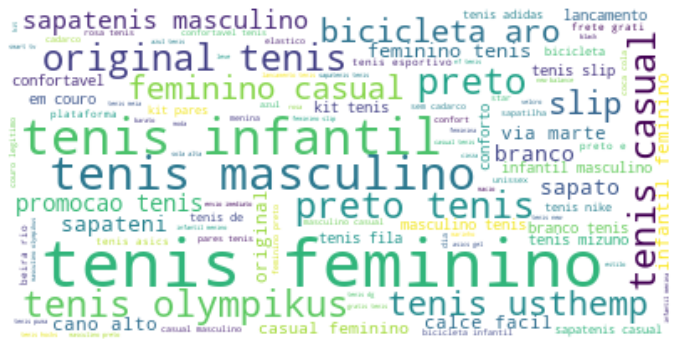

In [8]:
# Cria e gera o owrdcloud e a imagem
wordcloud = WordCloud(background_color="white").generate(text)

# Ajusta o tamanho da imagem
plt.figure(figsize = (12, 8))

# Utiliza o imshow para mostrar o Wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

# Remove os eixos
plt.axis("off")

# Mostra o gráfico
plt.show()

## 

### Word Embeddings e Similaridade de Cossenos

Para o problema de similaridade entre títulos de produtos, aplica o _Word Embeddings_ é um processo bem interessante pois ele vai além das contagens e freguências lá do _Bag of Words_ (como por exemplo utilizando um _CountVectorizer_ ou um _TF-IDF_), a semântica e as palavras utilizadas em conjunto têm influência e esse tipo de efeito é capturado pelo _Word Embeddings_, pois ele constroi um vetor para cada uma das palavras onde cada uma das dimensões serve como uma forma de capturar o significado da respectiva palavra.

A ferramnta utilizada aqui para desenvolver o _Word Embeddings_ foi o `Word2Vec`, onde como o próprio nome diz converte as palavras para uma forma vetorial de referência:

In [9]:
# Definindo o Word2Vec
model = Word2Vec(titles['filtered_words'])

Agora, serão definidas algumas funções para o cáçculo vetorial dos títulos e levantar a similaridade deles. No caso do `Word2Vec` ele cria o vetor por palavra, mas para montar o vetor representativo dos títulos deve-se utilizar a média dos vetores de cada uma das palavras do título.

Então as funções a seguir serve respectivamente para transformar os títulos na forma do vetor médio e depois cálcular a similaridade de cosssenos, onde pega-se o cosseno entre dois vetor e avalia o quão similares são:

In [10]:
# Titulo 1 para exemplificar as funções
titulo1 = ['tenis', 'para', 'caminhada', 'super', 'levinho', 'spider', 'corrida']

# Titulo 2 para exemplificar as funções
titulo2 = ['tenis', 'ascension', 'posh', 'masculino', 'preto', 'e', 'vermelho']

def word_to_vec(model, title):
    # Inicializa um vetor com zeros
    vector = 100 * [0]
    cnt = 0
    # Loop para sumariza os vetores das palavras
    for word in title:
        # Verifica se a palavra está no vocabulario (evitar problemas com o word2vec)
        if word in model.wv.index_to_key:
            # Adiciona o vetor ao vetor inicializado
            vector += model.wv.get_vector(word, norm = True)
            # Sumariza um no contador para a divisão
            cnt += 1

    # Retorna a média da soma dos vetores
    return np.array(vector)/cnt

def cosine_similarity(model, title1, title2):
    # Define o vetor para o primeiro titulo
    vector1 = word_to_vec(model, title1)
    
    # Define o vetor para o segundo titulo
    vector2 = word_to_vec(model, title2)
    
    # Retorna a similaridade de cossenos
    return np.round(np.dot(vector1, vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2)), 4)

# Testando as funções com o exemplo retirado dos dados
print("Similaridade: ", cosine_similarity(model, titulo1, titulo2))

Similaridade:  0.749


A função a seguir serve para fazer a aplicação da similaridade de cossenos entre duas colunas de _dataset_ utilizando o _Pandas_:

In [11]:
# Função para aplica o cosine_similarity entre as colunas
def cosine_pandas(model, data, col1, col2):
    # Cria uma lista vazia
    list_cosines = list()
    # Loop para explorar todo o conjunto de dados
    for i in range(data.shape[0]):
        # aplica o cosine_similarity
        cos_sim = cosine_similarity(model, data.loc[i, col1], data.loc[i, col2])
        # Salva na lista o score de similaridade
        list_cosines.append(cos_sim)
    
    # Retorna como uma series os scores
    return pd.Series(list_cosines)

## 

### Marcação dos dados de Teste

Definido o processo de cálculo do _score_ de similaridade entre os títulos dos produtos, resta agora aplicar na base de teste as funções:

In [12]:
# Carrega o conjunto de dados de teste
titles_test = pd.read_csv('items_titles_test.csv')

# Avalia os primeiros registros da tabela
titles_test.head(10)

,ITE_ITEM_TITLE
0,Tênis Olympikus Esporte Valente - Masculino Kids
1,Bicicleta Barra Forte Samy C/ 6 Marchas Cubo C...
2,Tênis Usthemp Slip-on Temático - Labrador 2
3,Tênis Casual Feminino Moleca Tecido Tie Dye
4,Tênis Star Baby Sapatinho Conforto + Brinde
5,Tênis Oakley Frequency 3.0 Preto/marrom
6,Tênis Jogging Feminino Premium Super Lançament...
7,Under Armour Hovr Phantom 2 Conexão Bluetooth ...
8,Tenis Infantil Feminino Menina Criança Moça
9,Tênis Labellamafia Saturn 6 Cores Disponíveis


Aplica-se o mesmo pré-processamento dos dados na base de teste:

In [13]:
# Aplica o mesmo pré-processamento para a base de teste
titles_test["ITE_ITEM_TITLE_1"] = titles_test['ITE_ITEM_TITLE'].apply(lambda x: preprocessing(x))

A base de teste venho apenas com uma coluna com os títulos de produtos. Então para demonstrar a aplicação das funções serão criadas duas colunas com amostras de 1000 produtos, podendo essas amostras terem reposições ou não. Poderia testar todas as combinações possíveis entre elemenots da base de teste mas nesse caso seria milhões de casos possíveis. 

Então para demonstrar a funcionalidade, a amostra de com 1000 elementos será suficiente:

In [14]:
# Define o tamanho da amostra
n_samples = 1000

# Cria a base de amostra
samples = pd.DataFrame(titles_test['ITE_ITEM_TITLE_1'].sample(n = n_samples, 
                                                              replace = True, 
                                                              ignore_index = True))

# cria a segunda coluna com amostras
samples.loc[:, 'ITE_ITEM_TITLE_2'] = titles_test['ITE_ITEM_TITLE_1'].sample(n = n_samples, 
                                                                            replace = True, 
                                                                            ignore_index = True)


# mostra o resultado
samples.head()

,ITE_ITEM_TITLE_1,ITE_ITEM_TITLE_2
0,"[sapatenis, em, sintetico, marinho, palmilha, ...","[tenis, dg, sorrento, g1, rosa, unissex, ouro]"
1,"[tenis, adidas, daily, 2, 0, branco, o, melhor...","[tenis, feminino, ramarim, 20, 80203, napa]"
2,"[tenis, infantil, kidy, 096, 0144, azul, marro...","[tenis, usthemp, short, tematico, pitbull, mar..."
3,"[5, pares, tenis, maculino, original, oldsen, ...","[bicicleta, groove, hype, 70, 29, 17, 27, velo..."
4,"[tenis, air, jordan, mid]","[tenis, masculino, infantil, de, luzinha, elas..."


In [15]:
# Calcula os scores
samples['scores'] = cosine_pandas(model, 
                                  samples, 
                                  'ITE_ITEM_TITLE_1', 
                                  'ITE_ITEM_TITLE_2')

In [16]:
# Ordena os exemplos pelo score
samples.sort_values(by = 'scores', ascending = False, inplace = True)

In [17]:
# Visualiza o resultado
samples.head(10)

,ITE_ITEM_TITLE_1,ITE_ITEM_TITLE_2,scores
377,"[tv, philco, 32, modelo, ph32f33dg, led]","[smart, tv, lg, ai, thinq, 55nano86sna, led, 4...",0.9895
277,"[tenis, feminino, olympikus, 235g, ultraleve, ...","[tenis, feminino, olympikus, decola, original]",0.9890
774,"[tenis, esportivo, feminino, casual, academia,...","[tenis, feminino, leve, super, confortavel, la...",0.9792
626,"[tenis, feminino, esportivo, conforto, olympik...","[tenis, feminino, olympikus, vortice, damasco,...",0.9785
362,"[bike, speed, 29]","[bicicleta, mountain, bike, carbono, sava, dec...",0.9768
579,"[tenis, casual, modare, ultraconforto, napa, b...","[tenis, feminino, vizzano, pelica, camurca, on...",0.9725
679,"[tenis, fila, axilus, ace, clay, limao, branco...","[tenis, fila, euro, jogger, sport, cinza, e, m...",0.9712
202,"[bicicleta, aro, 26, retro, classic, 1, marcha...","[bicicleta, caloi, 150, berlineta, dobravel]",0.9668
610,"[tenis, arezzo, slip, knit, solado, esportivo,...","[tenis, confortavel, feminino, jogging, preto,...",0.9667
816,"[tenis, impulsion, esporte, academia, masculin...","[tenis, sneaker, crossfit, feminino, treino, a...",0.9657


## 